<a href="https://colab.research.google.com/github/eunseojeon/AI_Coding_for_Autonomous_Driving_Class/blob/main/0704_%F0%9F%8E%AFMission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**🎯1번째 미션**

**🎯 Mission: 기본 플롯 만들기**
- 조건:
1. Import: import matplotlib.pyplot as plt
함수 정의: def setup_basic_plot(step_num=1, action="forward"):
2. 캔버스 크기: figsize=(10, 8)
3. 축 범위:
X축: -1부터 8까지.
Y축: -1부터 12까지
4. 글자 크기: 라벨과 제목에 fontsize=12 사용
레이아웃 최적화: plt.tight_layout() (show() 직전에)
5. 실행: if __name__ == "__main__": 안에서 setup_basic_plot(5, "turn_left") 호출
6. 추가 힌트:
함수는 ax 객체를 반환해야 함.
plt.show()로 화면에 표시
f-string 사용해서 동적 제목 만들기

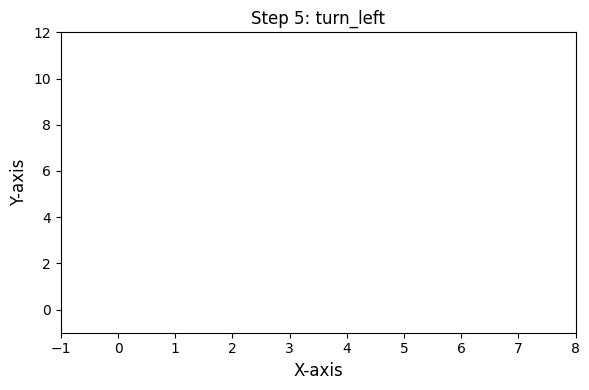

In [7]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    fig, ax = plt.subplots(figsize=(6, 4)) # 기존 10x8 크기는 너무 커서 6x4로 변경한 크기의 플롯(fig)과 축(ax) 생성
    ax.set_xlim(-1, 8)                      # X축 범위를 -1에서 8로 설정
    ax.set_ylim(-1, 12)                     # Y축 범위를 -1에서 12로 설정
    ax.set_xlabel("X-axis", fontsize=12)      # X축, 글자크기 12
    ax.set_ylabel("Y-axis", fontsize=12)      # Y축
    ax.set_title(f"Step {step_num}: {action}", fontsize=12)  # 단계와 동작
    plt.tight_layout() #레이아웃 자동 조정(겹침 방지)
    plt.show() #플롯을 화면에 표시
    return ax

if __name__ == "__main__": # 이 파일이 직접 실행될 때만 아래 코드 실행
    setup_basic_plot(5, "turn_left")  # 5단계, 좌회전


##**🎯2번째 미션**

**📝 Mission: 목표선 그리기 함수 만들기**
- 🎯 조건:
1. Import: import matplotlib.pyplot as plt
2. 함수 정의: def draw_goal_line(obstacles):
매개변수: obstacles (장애물들의 집합/리스트)
3. 캔버스 설정:
크기: figsize=(8, 6)
축 범위: X(-18), Y(-112)
격자: grid(True, alpha=0.3)
4. 목표선 계산:
가장 높은 장애물의 Y좌표 찾기
목표선 = 최대 Y좌표 + 3
장애물이 없으면 Y=0 기준
5. 목표선 그리기:
초록색 수평선 (color='lime')
6. 선 두께: linewidth=3
7. 투명도: alpha=0.7
8. 텍스트 표시:
위치: (7, goal_y + 0.2),
내용: f-string으로 "GOAL (y={goal_y})" 표시,
색상: 초록색,
9. 완성 요소:
범례 표시 (ax.legend())
레이아웃 최적화
10. 화면 출력
11. goal_y 값 반환
실행:
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용
함수 호출해서 결과 확인
12. 💡 힌트:
ax.axhline(): 수평선 그리기
max() 함수와 조건부 표현식 활용
ax.text()의 ha, va 매개변수 사용

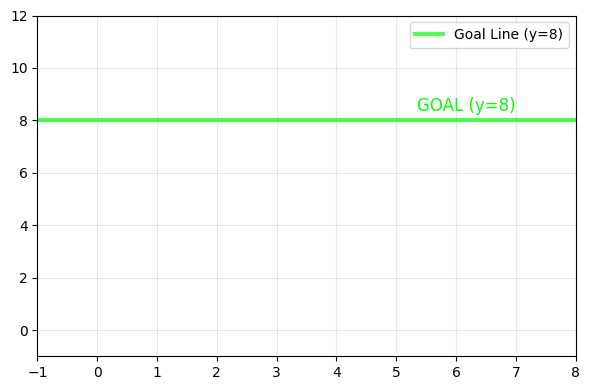

Goal line y: 8


In [8]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트

def draw_goal_line(obstacles):
    """
    장애물 집합(또는 리스트)을 받아 목표선을 그리는 함수
    obstacles: set or list of (x, y) tuples
    """
    fig, ax = plt.subplots(figsize=(6, 4)) # 기존 10x8 크기는 너무 커서 6x4로 변경한 크기의 플롯(fig)과 축(ax) 생성
    ax.set_xlim(-1, 8)                      # X축 범위를 -1에서 8로 설정
    ax.set_ylim(-1, 12)                     # Y축 범위를 -1에서 12로 설정
    ax.grid(True, alpha=0.3)                # 격자 표시, 투명도 0.3

    # 장애물의 Y좌표 중 가장 큰 값 찾기
    if obstacles:  # 장애물이 하나라도 있으면
        max_y = max(y for (x, y) in obstacles)  # 모든 장애물의 y좌표 중 최대값
        goal_y = max_y + 3                      # 목표선은 최대 y좌표 + 3
    else:  # 장애물이 없으면
        goal_y = 0                              # 목표선은 y=0

    # 목표선(Goal Line) 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")  # 초록색 수평선

    # 목표선 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', fontsize=12,
            ha='right', va='bottom')  # ha: 수평정렬, va: 수직정렬

    ax.legend()                   # 범례 표시
    plt.tight_layout()            # 레이아웃 자동 조정
    plt.show()                    # 플롯을 화면에 표시

    return goal_y                 # 목표선 y좌표 반환

# 실행 예시
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  # 장애물 집합
goal_y = draw_goal_line(obstacles)             # 함수 호출 및 결과 확인
print("Goal line y:", goal_y)                  # 목표선 y좌표 출력


##**🎯3번째 미션**

**📝 Mission: 장애물 그리기 함수 만들기**
- 🎯 조건:
- Import:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
- 함수 정의: def draw_obstacles(obstacles):
- 매개변수: obstacles (장애물 위치들의 set 또는 list)
- 캔버스 설정:
크기: figsize=(8, 6).
축 범위:
    ax.set_xlim(-1, 8)   # X축 범위: -1 ~ 8
    ax.set_ylim(-1, 12)  # Y축 범위: -1 ~ 12.
정사각형 비율: set_aspect('equal')
- 격자와 라벨 설정
- 데이터 처리:
set을 list로 변환하여 순서 보장.
isinstance() 함수로 타입 확인
- 장애물 그리기:
빨간색 사각형 (color='red', alpha=0.7).
크기: 0.8 x 0.8.
중심 좌표에서 0.4씩 빼서 위치 조정.
Rectangle 패치 사용.
- 텍스트 표시:
각 장애물 중앙에 번호 (흰색, 굵은 글씨).
enumerate() 함수로 번호 매기기
- 완성 요소:
범례 표시 (첫 번째 장애물에만 라벨)
콘솔에 정보 출력
레이아웃 최적화
- 실행:
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용
- 💡 핵심 힌트:
Rectangle((x-0.4, y-0.4), 0.8, 0.8): 사각형 생성.
ax.add_patch(rect): 사각형을 그래프에 추가.
enumerate(): 인덱스와 값을 동시에 가져오기.
isinstance(obstacles, set): 타입 확인.

Obstacle 1: (x=2, y=4)
Obstacle 2: (x=3, y=2)
Obstacle 3: (x=3, y=3)
Obstacle 4: (x=4, y=5)


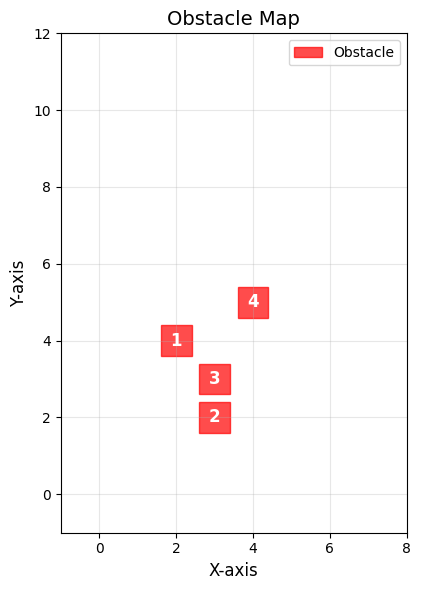

In [9]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트
from matplotlib.patches import Rectangle  # 사각형 패치(Rectangle) 임포트

def draw_obstacles(obstacles):
    """
    장애물 위치들을 받아서 빨간 사각형으로 시각화하는 함수
    obstacles: set 또는 list of (x, y) tuples
    """
    # 타입 확인 및 리스트 변환 (set이면 순서가 없으므로 list로 변환)
    if isinstance(obstacles, set):
        obstacles = list(obstacles)  # set → list로 변환
    # 장애물 위치를 정렬(옵션, 보기 좋게)
    obstacles = sorted(obstacles)

    fig, ax = plt.subplots(figsize=(8, 6))  # 8x6 크기의 플롯(fig)과 축(ax) 생성
    ax.set_xlim(-1, 8)                      # X축 범위: -1 ~ 8
    ax.set_ylim(-1, 12)                     # Y축 범위: -1 ~ 12
    ax.set_aspect('equal')                  # 정사각형 비율로 설정
    ax.grid(True, alpha=0.3)                # 격자 표시, 투명도 0.3
    ax.set_xlabel("X-axis", fontsize=12)    # X축 라벨 (한글: X축)
    ax.set_ylabel("Y-axis", fontsize=12)    # Y축 라벨 (한글: Y축)
    ax.set_title("Obstacle Map", fontsize=14)  # 제목

    # 장애물 그리기
    for idx, (x, y) in enumerate(obstacles):
        # 사각형의 좌측 하단 좌표 계산 (중심에서 0.4씩 빼기)
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label='Obstacle' if idx == 0 else None)  # 첫 번째만 범례 라벨
        ax.add_patch(rect)  # 사각형을 플롯에 추가

        # 장애물 중앙에 번호 표시 (흰색, 굵은 글씨)
        ax.text(x, y, str(idx + 1), color='white', fontsize=12,
                ha='center', va='center', fontweight='bold')

        # 콘솔에 장애물 정보 출력
        print(f"Obstacle {idx + 1}: (x={x}, y={y})")  # 장애물 번호와 좌표

    ax.legend()                # 범례 표시
    plt.tight_layout()         # 레이아웃 자동 조정
    plt.show()                 # 플롯을 화면에 표시

# 실행 예시
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  # 장애물 집합
draw_obstacles(obstacles)                      # 함수 호출 및 결과 확인


##**🎯추가번째 미션**
### **<위 3가지 조건을 다 합치기>**

Obstacle 1: (x=2, y=4)
Obstacle 2: (x=3, y=2)
Obstacle 3: (x=3, y=3)
Obstacle 4: (x=4, y=5)


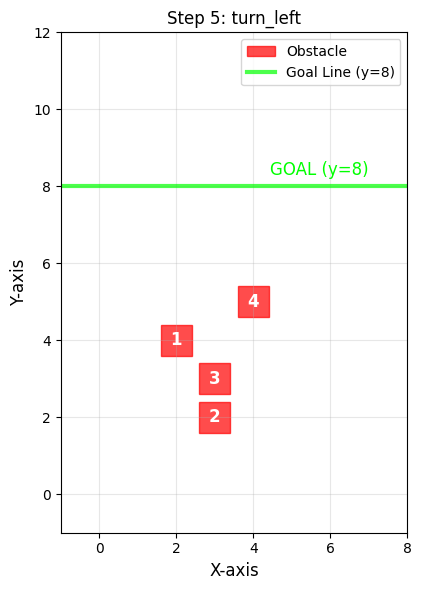

Goal line y: 8


In [10]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트
from matplotlib.patches import Rectangle  # 사각형 패치(Rectangle) 임포트

def setup_basic_plot(step_num=1, action="forward"):
    """
    기본 플롯을 설정하는 함수. step_num: 단계 번호. action: 동작 이름
    """
    fig, ax = plt.subplots(figsize=(8, 6))  # 8x6 크기의 플롯(fig)과 축(ax) 생성
    ax.set_xlim(-1, 8)                      # X축 범위: -1 ~ 8
    ax.set_ylim(-1, 12)                     # Y축 범위: -1 ~ 12
    ax.set_xlabel("X-axis", fontsize=12)    # X축 라벨 (한글: X축)
    ax.set_ylabel("Y-axis", fontsize=12)    # Y축 라벨 (한글: Y축)
    ax.set_title(f"Step {step_num}: {action}", fontsize=12)  # 동적으로 제목 설정
    ax.grid(True, alpha=0.3)                # 격자 표시, 투명도 0.3
    ax.set_aspect('equal')                  # 정사각형 비율로 설정
    return fig, ax                          # fig, ax 객체 반환

def draw_goal_line(ax, obstacles):
    """
    장애물 집합(또는 리스트)을 받아 목표선을 그리는 함수
    ax: matplotlib 축 객체
    obstacles: set or list of (x, y) tuples
    """
    # 장애물의 Y좌표 중 가장 큰 값 찾기
    if obstacles:
        max_y = max(y for (x, y) in obstacles)  # 모든 장애물의 y좌표 중 최대값
        goal_y = max_y + 3                      # 목표선은 최대 y좌표 + 3
    else:
        goal_y = 0                              # 장애물이 없으면 y=0

    # 목표선(Goal Line) 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")

    # 목표선 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', fontsize=12,
            ha='right', va='bottom')  # ha: 수평정렬, va: 수직정렬

    return goal_y  # 목표선 y좌표 반환

def draw_obstacles(ax, obstacles):
    """
    장애물 위치들을 받아서 빨간 사각형으로 시각화하는 함수
    ax: matplotlib 축 객체
    obstacles: set 또는 list of (x, y) tuples
    """
    # 타입 확인 및 리스트 변환 (set이면 순서가 없으므로 list로 변환)
    if isinstance(obstacles, set):
        obstacles = list(obstacles)
    obstacles = sorted(obstacles)

    for idx, (x, y) in enumerate(obstacles):
        # 사각형의 좌측 하단 좌표 계산 (중심에서 0.4씩 빼기)
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label='Obstacle' if idx == 0 else None)  # 첫 번째만 범례 라벨
        ax.add_patch(rect)  # 사각형을 플롯에 추가

        # 장애물 중앙에 번호 표시 (흰색, 굵은 글씨)
        ax.text(x, y, str(idx + 1), color='white', fontsize=12,
                ha='center', va='center', fontweight='bold')

        # 콘솔에 장애물 정보 출력
        print(f"Obstacle {idx + 1}: (x={x}, y={y})")  # 장애물 번호와 좌표

# 실행 예시
if __name__ == "__main__":
    step_num = 5
    action = "turn_left"
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  # 장애물 집합

    # 1. 기본 플롯 설정
    fig, ax = setup_basic_plot(step_num, action)

    # 2. 장애물 그리기
    draw_obstacles(ax, obstacles)

    # 3. 목표선 그리기
    goal_y = draw_goal_line(ax, obstacles)

    # 4. 범례, 레이아웃, 플롯 표시
    ax.legend()
    plt.tight_layout()
    plt.show()

    print("Goal line y:", goal_y)  # 목표선 y좌표 출력


##**🎯4번째 미션**

**📝 Mission: 이동 경로 그리기 함수 만들기**
- 🎯 조건:
1. Import 설정:
import matplotlib.pyplot as plt
2. 함수 정의:
def draw_path(path):
매개변수: path (이동 경로 좌표들의 리스트)
3. 캔버스 설정:
크기: figsize=(8, 6)
축 범위: X(-18), Y(-112)
정사각형 비율: ax.set_aspect('equal')
격자: grid(True, alpha=0.3)
제목: "Movement Path"
4. 경로 그리기 (2개 이상 점):
경로선: 초록색 점선 ('g--')
선 두께: linewidth=3, 투명도: alpha=0.8
리스트 컴프리헨션으로 x, y 좌표 분리
ax.plot(path_x, path_y, ...) 사용
5. 시작점과 끝점 표시:
시작점: 파란색 원 ('bo', markersize=10)
끝점: 빨간색 원 ('ro', markersize=10)
라벨에 좌표 정보 포함
6. 점 번호 표시:
각 경로 점에 번호 (1, 2, 3...)
위치: (x + 0.2, y + 0.2)
노란색 둥근 박스 배경
enumerate() 함수로 번호 매기기

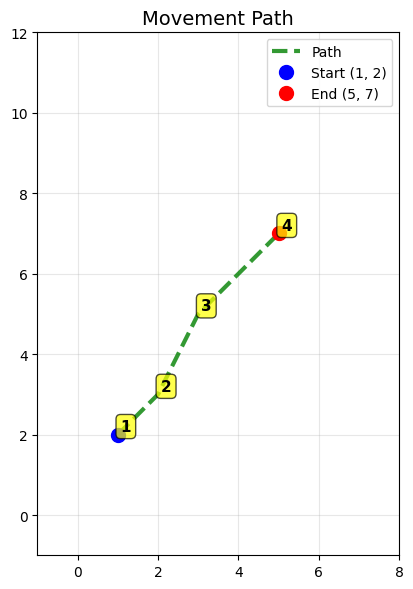

In [11]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트

def draw_path(path):
    """
    이동 경로 좌표 리스트를 받아 경로를 시각화하는 함수
    path: list of (x, y) tuples
    """
    fig, ax = plt.subplots(figsize=(8, 6))  # 8x6 크기의 플롯(fig)과 축(ax) 생성
    ax.set_xlim(-1, 8)                      # X축 범위: -1 ~ 8
    ax.set_ylim(-1, 12)                     # Y축 범위: -1 ~ 12
    ax.set_aspect('equal')                  # 정사각형 비율로 설정
    ax.grid(True, alpha=0.3)                # 격자 표시, 투명도 0.3
    ax.set_title("Movement Path", fontsize=14)  # 제목

    # x, y 좌표 분리 (리스트 컴프리헨션)
    path_x = [x for (x, y) in path]
    path_y = [y for (x, y) in path]

    # 경로선 그리기 (점이 2개 이상일 때만)
    if len(path) >= 2:
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8, label="Path")  # 초록색 점선

    # 시작점 표시 (파란색 원)
    if path:
        start_x, start_y = path[0]
        ax.plot(start_x, start_y, 'bo', markersize=10, label=f"Start ({start_x}, {start_y})")  # 시작점

    # 끝점 표시 (빨간색 원)
    if len(path) >= 2:
        end_x, end_y = path[-1]
        ax.plot(end_x, end_y, 'ro', markersize=10, label=f"End ({end_x}, {end_y})")  # 끝점

    # 각 점에 번호 표시 (노란색 둥근 박스)
    for idx, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(idx + 1),
                color='black', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7),
                ha='center', va='center')  # ha/va: 정렬

    ax.legend()                # 범례 표시
    plt.tight_layout()         # 레이아웃 자동 조정
    plt.show()                 # 플롯을 화면에 표시

# 실행 예시
if __name__ == "__main__":
    path = [(1, 2), (2, 3), (3, 5), (5, 7)]  # 이동 경로 예시
    draw_path(path)  # 함수 호출 및 결과 확인


##**🎯마지막 미션**
1. 함수 정의: def draw_sensors(x, y, sensors):
2. 캔버스: figsize=(6, 5), 격자, 제목 "Sensors"
3. 차량 위치: 검은색 원점 'ko', markersize=15
4. 센서 선 그리기: 전방: 'b-' (x, y) → (x, y + sensors['front']) 좌측: 'g-' (x, y) → (x - sensors['left'], y) 우측: 'r-' (x, y) → (x + sensors['right'], y) 모든 선: linewidth=3  
5. 사용자 10:55 AM
6. 거리 텍스트 표시: ax.text(x + 0.1, y + front_reach/2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')
7. 센서 끝점 동그라미: # 센서 끝점에 점 표시 ax.plot(x, y + front_reach, 'bo', markersize=8) # 전방 끝점
8. 최대 센서 길이 제한: sensor_length = 3 # 최대 센서 길이 front_reach = min(sensors['front'], sensor_length)

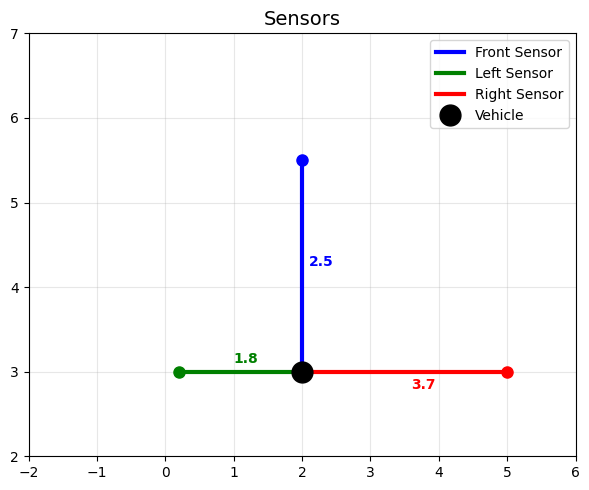

In [12]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트

def draw_sensors(x, y, sensors):
    """
    차량 위치 (x, y)와 센서 거리 딕셔너리를 받아 센서 시각화
    sensors: {'front': float, 'left': float, 'right': float}
    """
    fig, ax = plt.subplots(figsize=(6, 5))  # 6x5 크기의 플롯 생성
    ax.grid(True, alpha=0.3)                # 격자 표시, 투명도 0.3
    ax.set_title("Sensors", fontsize=14)    # 제목

    # 최대 센서 길이 제한
    sensor_length = 3

    # 전방 센서
    front_reach = min(sensors['front'], sensor_length)
    ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=3, label='Front Sensor')  # 전방 센서선(파랑)
    ax.plot(x, y + front_reach, 'bo', markersize=8)  # 전방 센서 끝점(파란 점)
    ax.text(x + 0.1, y + front_reach / 2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')  # 거리 텍스트

    # 좌측 센서
    left_reach = min(sensors['left'], sensor_length)
    ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=3, label='Left Sensor')  # 좌측 센서선(초록)
    ax.plot(x - left_reach, y, 'go', markersize=8)  # 좌측 센서 끝점(초록 점)
    ax.text(x - left_reach / 2 - 0.1, y + 0.1, f'{sensors["left"]:.1f}', color='green', fontweight='bold')  # 거리 텍스트

    # 우측 센서
    right_reach = min(sensors['right'], sensor_length)
    ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=3, label='Right Sensor')  # 우측 센서선(빨강)
    ax.plot(x + right_reach, y, 'ro', markersize=8)  # 우측 센서 끝점(빨간 점)
    ax.text(x + right_reach / 2 + 0.1, y - 0.2, f'{sensors["right"]:.1f}', color='red', fontweight='bold')  # 거리 텍스트

    # 차량 위치 표시 (검은색 원)
    ax.plot(x, y, 'ko', markersize=15, label='Vehicle')  # 차량 위치(검은 점)

    # 축 범위 자동 조정 (센서 길이에 따라)
    ax.set_xlim(x - sensor_length - 1, x + sensor_length + 1)
    ax.set_ylim(y - 1, y + sensor_length + 1)

    ax.legend()
    plt.tight_layout()
    plt.show()

# 실행 예시
if __name__ == "__main__":
    sensors = {'front': 2.5, 'left': 1.8, 'right': 3.7}
    draw_sensors(2, 3, sensors)
